In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
curr_dir=os.getcwd()
#print(curr_dir)
f_path = os.path.join(curr_dir, "data", "cancer patient data sets.csv")
df=pd.read_csv(f_path)
df=df.drop("index", axis=1)
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [23]:
final_features_method2b = ['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']
len(final_features_method2b)

14

In [24]:
from sklearn.model_selection import train_test_split
y = df["Level"]
X = df.drop(["Patient Id","Level"], axis=1)
X= X[final_features_method2b]
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [25]:
X_train.shape

(700, 14)

# Section 4. Simple Models

### Simple Models selected for classifcation task
For our multiclass classification task, we chose two simple models to explore different aspects of predictive performance:
1. Logistic Regression: In addition to the SVM model done for our baseline model earlier, this linear classifier allows us to assess performance against another linear model. This comparison helps in validating our model's ability to effectively separate data points linearly.

2. k-nearest neighbors (KNN): A simple yet expressive method that allows us to handle complex decision boundaries, making it a valuable addition to our analysis.

### Define functions 

- **gridsearch_method** utilises scikit-learn's GridSearchCV and exhaustively searches various hyperparameter combinations we provided to find our model's most optimal hyperparameter. By partitioning the data into k subsets (defaulting to k=5), it is trained on k-1 subsets and validated by the remaining subset for every fold. This allows us to obtain a robust estimate of each model's validation set performance.


- **evluation_metrics** provides a comprehensive overview of the model's performance and incorporate the following metrics: accuracy, precision, recall, and F1-score. Given our multiclass classification task, we employ Macro-averaging to treat each class' metrics equally. While this approach suits our well-balanced classes, it may shift with imbalanced data in the future. Lastly we visualise the results using confusion matrices to facilitate easier detection of misclassifications and possible biases in the model's predictions.


#### Model 2: Logistic Regression

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

logreg_params = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'max_iter': [1500]}

def gridsearch_method(model, params, model_name, cv_=5):
    global X_train, X_test, y_train, y_test
    grid=GridSearchCV(model, param_grid=params, cv=cv_)
    grid.fit(X_train, y_train)
    print(f'Best {model_name} hyperparameters: {grid.best_estimator_}')
    print(f'Best {model_name} validation score: {grid.best_score_}')
    y_pred=grid.predict(X_test)
    accuracy_=accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy on test set: {accuracy_}')
    return y_pred

y_pred_logreg=gridsearch_method(model=LogisticRegression(), params= logreg_params, model_name="Logistic Regression")


Best Logistic Regression hyperparameters: LogisticRegression(C=1, max_iter=1500)
Best Logistic Regression validation score: 0.9985714285714286
Logistic Regression accuracy on test set: 1.0


 Precision: 1.00, Recall: 1.00, F1-score: 1.00


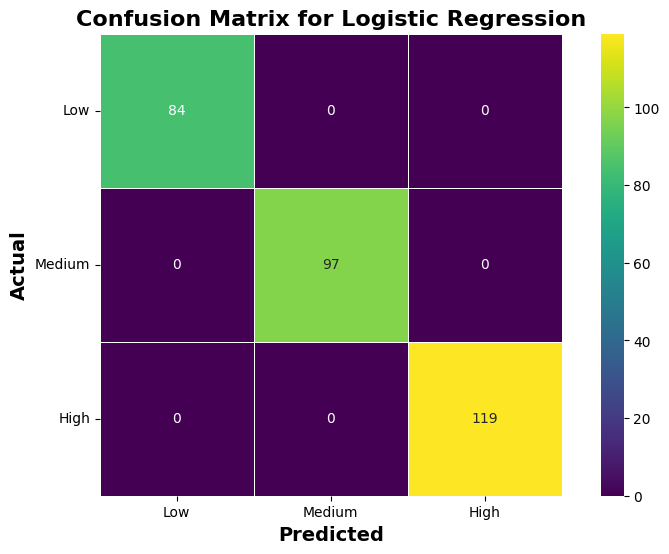

In [27]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

def evaluation_metrics(y_true, y_pred, model_name, average_type=None): #choices for average_type: {‘binary’, ‘micro’, ‘macro’}
    scores=precision_recall_fscore_support(y_true, y_pred, average=average_type)
    print(f" Precision: {scores[0]:.2f}, Recall: {scores[1]:.2f}, F1-score: {scores[2]:.2f}")
    confusion_scores_matrix = confusion_matrix(y_true, y_pred)
    unique_labels = ["Low", "Medium", "High"]
    sorted_label_ind=[sorted(unique_labels).index(x) for x in unique_labels]
    confusion_scores_matrix_sorted = confusion_scores_matrix[:, sorted_label_ind][sorted_label_ind, :]
    plt.figure(figsize=(10, 6))
    # unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    sns.heatmap(
        
        confusion_scores_matrix_sorted, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
        xticklabels=["Low", "Medium","High"],
        yticklabels=["Low", "Medium","High"]
    )
    
    # ax.set_title(f'Confusion Matrix for {model_name}', fontsize=16, fontweight='bold')
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=14, fontweight='bold')
    plt.yticks(rotation=360)
    plt.show()

evaluation_metrics(y_test, y_pred_logreg, 'Logistic Regression', average_type='macro')

*Figure X1. The confusion matrix for Logistic Regression. The heatmap illustrates classification results with "Low," "Medium," and "High" labels, while side labels show counts for each prediction.*

Similar to the baseline model, the Logistic Regression model achieves perfect classification accuracy on the test set, as evidenced by a lack of misclassifications observed in the confusion matrix (Figure X1). Consequently, precision, recall, and F1-score all attain a value of 1. This validates the suitability of using linear models for predicting lung cancer occurrence in the dataset.

Furthermore, the feature engineering applied to the dataset highlight the effectiveness of the chosen features in capturing relevant information for the classification task.

### Manual exploration for hyperparameters in Logistic Regression
Given the single main hyperparameter, "C," inherent in Logistic Regression, we visualised its impact on accuracy. We executed the Logistic Regression model across a range of C values, spanning from 0.001 to 100.


### Define functions

- **explore_logistic_regression** is specifically designed for Logistic Regression, allowing for comparison across different Logistic Regression models with varying feature engineering or modifications if necessary. By plotting accuracy performance against different C values, it offers insights into parameter effects and the bias-variance trade-off.

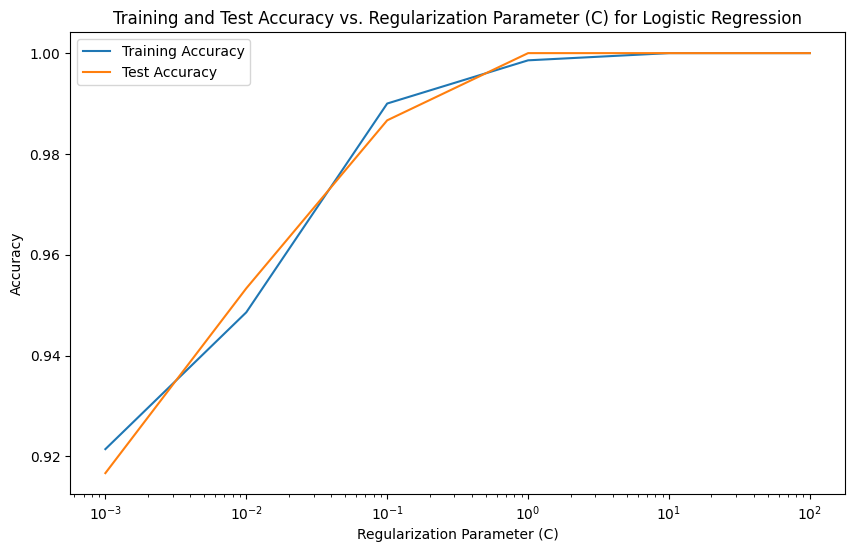

In [28]:

def explore_logistic_regression(C_values):
    global X_train, X_test, y_train, y_test
    train_lst = []
    test_lst = []
    
    for C_value in C_values:
        # Create and fit the logistic regression model
        logreg = LogisticRegression(C=C_value, max_iter=1000)
        logreg.fit(X_train, y_train)
        
        # Compute training error
        train_preds = logreg.predict(X_train)
        train_acc_score= accuracy_score(y_train, train_preds)
        train_lst.append(train_acc_score)
        
        # Compute test error
        test_preds = logreg.predict(X_test)
        test_acc_score= accuracy_score(y_test, test_preds)
        test_lst.append(test_acc_score)
    
    # Plot errors
    plt.figure(figsize=(10, 6))
    plt.plot(C_values, train_lst, label="Training Accuracy")
    plt.plot(C_values, test_lst, label="Test Accuracy")
    plt.xscale('log')  #log scale for C values
    plt.ylabel("Accuracy")
    plt.xlabel("Regularization Parameter (C)")
    plt.title("Training and Test Accuracy vs. Regularization Parameter (C) for Logistic Regression")
    plt.legend()
    plt.show()

# Example usage:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
explore_logistic_regression(C_values)
 

*Figure X2. Graph of Training and Test Accuracy agaisnt a range of Regularization Parameter (C) from 0.001 to 100 in the Logistic Regression model employed.*

Since there is only one hyperparameter for logistic regression that we tuned, we visualized its impact on accuracy. “C”, which controls the strength of the regularisation.  A larger "C" will lead to a weaker regularisation, generating a more complex model, vice-versa.. <br>

As "C" increases from 0.001 to 100 (Figure X2), both training and test accuracy improve. This suggest that when employing a strong regularisation (smaller "C" value), the model will become simpler, exhibiting underfitting, particularly when excessively low "C" values is used. This could be due to the high bias observed. <br>

Notably, the model maintain relatively high accuracy overall across the "C" values but peaks between 10 and 100 in "C" (Figure X2). The higher spectrum of the "C" values in the graph suggest that weak regularisation in the linear model yields the optimal performance in predicting the classification of our dataset. However, we opted for optimal value of 10, as it is closer to the default value (C=1), aiming to prevent excessively high variance and enhance generalisation performance.

#### Model 3: k-nearest neighbors (KNN)

In [29]:
knn_params = {'n_neighbors': [3, 5, 7, 9]}
y_pred_knn=gridsearch_method(model=KNeighborsClassifier(), params= knn_params, model_name="KNN")

Best KNN hyperparameters: KNeighborsClassifier(n_neighbors=3)
Best KNN validation score: 0.9971428571428571
KNN accuracy on test set: 0.9966666666666667


The grid-score represents the accuracy score of the validation set which is different from the accuracy score of the test set

 Precision: 1.00, Recall: 1.00, F1-score: 1.00


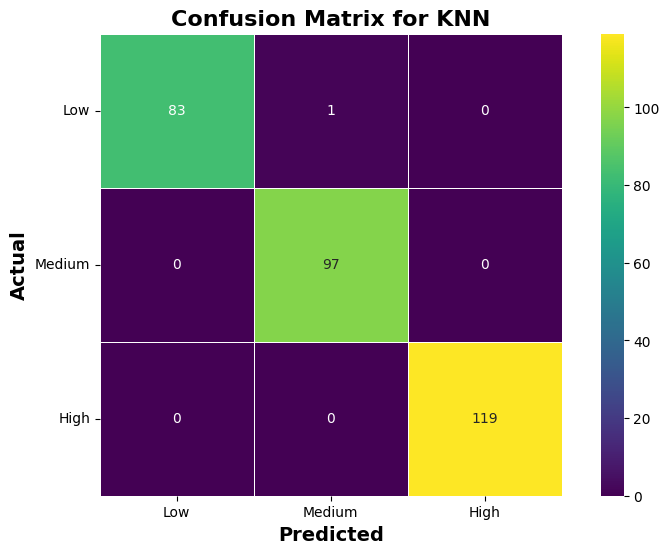

In [30]:

evaluation_metrics(y_test, y_pred_knn, 'KNN', average_type='macro')


*Figure X3. The confusion matrix for KNN. The heatmap illustrates classification results with "Low," "Medium," and "High" labels, while side labels show counts for each prediction.*

Although Figure X3 exhibit KNN having 1 label being misclassified, resulting in the F1 score for the "Low" class to be 0.994, the macro-average of the F1-score is 0.998, which round to 1.000 when formatting to 3dp. This highlights the robust performance of the KNN model in accurately predicting lung cancer occurrence across the dataset.

### Manual exploration for hyperparameters in KNN
Similarly, KNN has only one main parameter, "k", representing the number of nearest neighbors. We executed the KNN model across a range of C values, spanning from 1 to 20.
Here, we will run the KNN model for values of k from 1 to 20.

### Define functions
- **explore_kNN** is specifically designed for KNN, allowing for comparison across different KNN models with varying feature engineering or modifications if necessary. By plotting accuracy performance against different C values, it offers insights into parameter effects and the bias-variance trade-off.


range(1, 20) [1.0, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9914285714285714, 0.9914285714285714, 0.9914285714285714, 0.9828571428571429, 0.9571428571428572, 0.93, 0.93, 0.9157142857142857, 0.9057142857142857, 0.8928571428571429, 0.8814285714285715]
range(1, 20) [1.0, 1.0, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9766666666666667, 0.9766666666666667, 0.9766666666666667, 0.9666666666666667, 0.9266666666666666, 0.9266666666666666, 0.9266666666666666, 0.92, 0.9133333333333333, 0.91, 0.9]


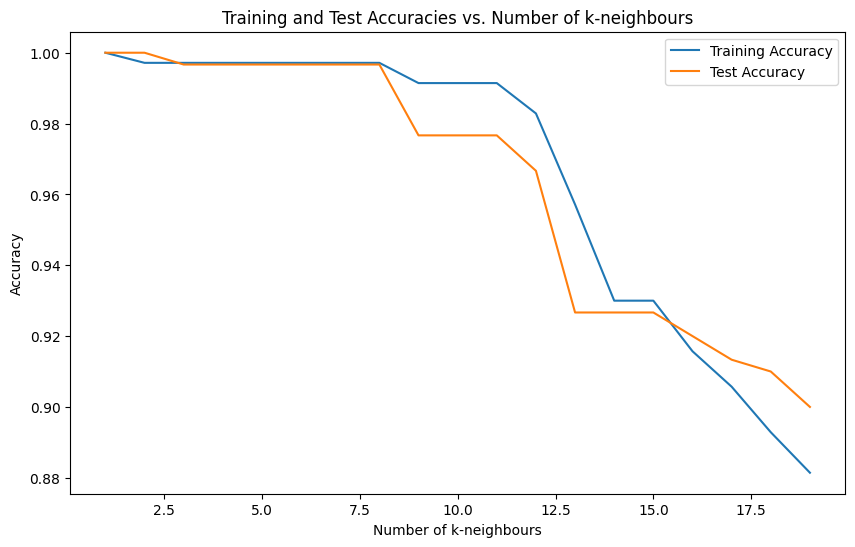

In [31]:
# Define the range of neighbors
k_neighbours_lst = range(1, 20)

def explore_kNN(k_neighbours_lst):
    global X_train, X_test, y_train, y_test
    train_lst=[]
    test_lst=[]


    for neighbour in k_neighbours_lst:
        knn = KNeighborsClassifier(n_neighbors=neighbour)
        knn.fit(X_train, y_train)
        train_preds=knn.predict(X_train)
        train_acc_score= accuracy_score(y_train, train_preds)
        train_lst.append(train_acc_score)
        test_preds=knn.predict(X_test)
        test_acc_score= accuracy_score(y_test, test_preds)
        test_lst.append(test_acc_score)

    print(k_neighbours_lst, train_lst)
    print(k_neighbours_lst, test_lst)
    plt.figure(figsize=(10, 6))
    plt.plot(k_neighbours_lst, train_lst, label="Training Accuracy")
    plt.plot(k_neighbours_lst, test_lst, label="Test Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Number of k-neighbours")
    plt.title("Training and Test Accuracies vs. Number of k-neighbours")
    plt.legend()
    plt.show()


explore_kNN(k_neighbours_lst)

*Figure X4. Graph of Training and Test Accuracy agaisnt a range of k from 1 to 20 in the kNN model employed.*

Across the range of k values from 1 to 12 (Figure X4), both test and training accuracies consistently remain high. This indicates that the model's ability to achieves perfect to almost-prefect accuracy on the test data when using these selected features and the range of hyperparameters. This suggests that the model's performance on unseen data (test set) is generally excellent. However, for optimal performance, we chose value of k=3 onwards as very small k of k=1 to 2 can lead to excessively high variance and overfitting for future dataset. 

However, beyond k=12, there is notable drop in test accuracy drop. This occurs because the larger "k" values results in the decision boundary to be too smooth, overlooking important patterns in the data, which leads to high bias and underfitting.

To conclude,  both models (logistic regression and KNN) exhibit excellent performance on the given dataset, even when using a subset of features selected based on pca, achieve almost-perfect accuracy on both training and test datasets for certain values of hyperparameters. These results suggest that the models are able to effectively capture the underlying patterns in the data and also validate that it generalise well to unseen data.